In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
clinical_trial_file = "./datasource/clinicaltrial_data.csv"
mouse_drug_file = "./datasource/mouse_drug_data.csv"

In [4]:
# Read clinical_trial file
clinical_trial = pd.read_csv(clinical_trial_file)
clinical_trial.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [5]:
# Read mouse_drug file
mouse_drug = pd.read_csv(mouse_drug_file)
mouse_drug.head() 

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# Merge dfs
main_data = pd.merge(mouse_drug , clinical_trial, on="Mouse ID", how="outer")
main_data.info() # No blank in columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [7]:
main_data.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vol_mean = main_data.groupby(["Drug","Timepoint"],axis=0).agg({"Tumor Volume (mm3)":"mean"})
tumor_vol_mean.reset_index(inplace=True)
# Preview DataFrame
tumor_vol_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
tumor_vol_sem = main_data.groupby(["Drug","Timepoint"],axis=0).agg({"Tumor Volume (mm3)":"sem"})
tumor_vol_sem.reset_index(inplace=True)
tumor_vol_sem


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [10]:

tumor_vol_mean.head(10)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
tumor_vol_grp = tumor_vol_mean.pivot_table(index=["Timepoint"], columns='Drug', values='Tumor Volume (mm3)') 
tumor_vol_grp


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


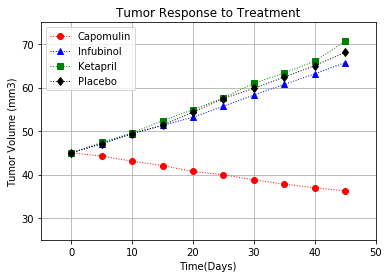

In [12]:
# Generate the Plot (with Error Bars)

timepoint = tumor_vol_grp.index
Capomulin = tumor_vol_grp['Capomulin']
Infubinol = tumor_vol_grp['Infubinol']
Ketapril = tumor_vol_grp['Ketapril']
Placebo = tumor_vol_grp['Placebo']

# Plot our lines 
plt.plot(timepoint, Capomulin, color="red", marker='o', linestyle=":",linewidth=1, label="Capomulin")
plt.plot(timepoint, Infubinol, color="blue", marker='^', linestyle=":",linewidth=1, label="Infubinol")
plt.plot(timepoint, Ketapril, color="green", marker='s', linestyle=":",linewidth=1, label="Ketapril")
plt.plot(timepoint, Placebo, color="black", marker='d', linestyle=":",linewidth=1, label="Placebo")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

# Set x and y limits
plt.xlim(-5, 50)
plt.ylim(25, 75)

# Set Title and labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("tumor_response_to_treatment.png")


In [13]:
# Show the Figure
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [14]:

main_data.head(5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastatic_sites_mean = main_data.groupby(["Drug","Timepoint"],axis=0).agg({"Metastatic Sites":"mean"})
metastatic_sites_mean
metastatic_sites_mean.reset_index(inplace=True)

# Preview DataFrame
metastatic_sites_mean.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

metastatic_sites_sem = main_data.groupby(["Drug","Timepoint"],axis=0).agg({"Metastatic Sites":"sem"})
metastatic_sites_sem.reset_index(inplace=True)
metastatic_sites_sem.head(10)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

ms_mean_grp = metastatic_sites_mean.pivot_table(index=["Timepoint"], columns='Drug', values='Metastatic Sites') 
ms_mean_grp


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


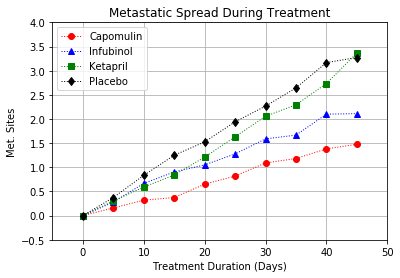

In [18]:
# Generate the Plot (with Error Bars)

timepoint = ms_mean_grp.index
Capomulin = ms_mean_grp['Capomulin']
Infubinol = ms_mean_grp['Infubinol']
Ketapril = ms_mean_grp['Ketapril']
Placebo = ms_mean_grp['Placebo']

# Plot our lines 
plt.plot(timepoint, Capomulin, color="red", marker='o', linestyle=":",linewidth=1, label="Capomulin")
plt.plot(timepoint, Infubinol, color="blue", marker='^', linestyle=":",linewidth=1, label="Infubinol")
plt.plot(timepoint, Ketapril, color="green", marker='s', linestyle=":",linewidth=1, label="Ketapril")
plt.plot(timepoint, Placebo, color="black", marker='d', linestyle=":",linewidth=1, label="Placebo")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

# Set x and y limits
plt.xlim(-5, 50)
plt.ylim(-0.5, 4.0)

# Set Title and labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save the Figure
plt.savefig("metastatic_spread_during_treatment.png")



In [19]:
# Show the Figure
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

mice_count = main_data.groupby(["Drug","Timepoint"],axis=0).agg({"Mouse ID":"count"})
mice_count.reset_index(inplace=True)
mice_count.rename(columns={"Mouse ID":"Mouse Count"}, inplace=True)
mice_count.head(10)


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [21]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mice_count_grp = mice_count.pivot_table(index=["Timepoint"], columns='Drug', values='Mouse Count')
mice_count_grp

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


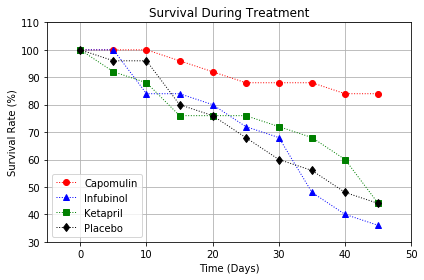

In [22]:
# Generate the Plot (Accounting for percentages)
timepoint = mice_count_grp.index
Capomulin = [ x*100/25 for x in  mice_count_grp['Capomulin'] ]
Infubinol = [ x*100/25 for x in  mice_count_grp['Infubinol'] ]
Ketapril = [ x*100/25 for x in  mice_count_grp['Ketapril'] ]
Placebo = [ x*100/25 for x in  mice_count_grp['Placebo'] ]

# Plot lines 
plt.plot(timepoint, Capomulin, color="red", marker='o', linestyle=":",linewidth=1, label="Capomulin")
plt.plot(timepoint, Infubinol, color="blue", marker='^', linestyle=":",linewidth=1, label="Infubinol")
plt.plot(timepoint, Ketapril, color="green", marker='s', linestyle=":",linewidth=1,label="Ketapril")
plt.plot(timepoint, Placebo, color="black", marker='d', linestyle=":",linewidth=1, label="Placebo")

# Get "best" position for Legend
plt.legend(loc="best")

# Set x and y limits
plt.ylim(30, 110)
plt.xlim(-5, 50)

# Set Title and labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("survival_during_treatment.png")

# Show the Figure
plt.tight_layout()
plt.show()

## Summary Bar Graph

In [91]:
# Calculate the percent changes for each drug (Tumor Volume (mm3))
drugs  = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
drugs_vol_pct = [print(  "{} {}".format(x, ((tumor_vol_grp.loc[45,x] * 100) / tumor_vol_grp.loc[0,x] ) - 100 )) for x in drugs]
drugs_vol_pct

Capomulin -19.47530266789417
Ceftamin 42.51649185589744
Infubinol 46.123471727851864
Ketapril 57.02879468660606
Naftisol 53.923347134769244
Placebo 51.29796048315151
Propriva 47.24117486320637
Ramicane -22.320900462766673
Stelasyn 52.085134287899024
Zoniferol 46.579750865095264


[None, None, None, None, None, None, None, None, None, None]

In [60]:
tumor_vol_grp

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
